<a href="https://colab.research.google.com/github/thefarofa/Invest/blob/main/06_Simulando_Carteiras_de_A%C3%A7%C3%B5es_Aleat%C3%B3rias_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importando Bibliotecas


In [1]:
# Configurando Yahoo Finance
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import random

# 2. Obtendo e tratando os dados

In [8]:
tickers_ibov = "ABEV3.SA AZUL4.SA B3SA3.SA BBAS3.SA BBDC3.SA BBDC4.SA BBSE3.SA BEEF3.SA BPAC11.SA BRAP4.SA BRFS3.SA BRKM5.SA CCRO3.SA CIEL3.SA CMIG4.SA COGN3.SA CRFB3.SA CSAN3.SA CSNA3.SA CVCB3.SA CYRE3.SA ECOR3.SA EGIE3.SA ELET3.SA ELET6.SA EMBR3.SA ENBR3.SA EQTL3.SA FLRY3.SA GGBR4.SA GOAU4.SA GOLL4.SA HAPV3.SA HYPE3.SA IRBR3.SA ITSA4.SA ITUB4.SA JBSS3.SA KLBN11.SA LREN3.SA MGLU3.SA MRFG3.SA MRVE3.SA MULT3.SA NTCO3.SA PETR3.SA PETR4.SA QUAL3.SA RADL3.SA RAIL3.SA RENT3.SA SANB11.SA SBSP3.SA SUZB3.SA TAEE11.SA TOTS3.SA UGPA3.SA USIM5.SA VALE3.SA WEGE3.SA YDUQ3.SA"

dados_yahoo = yf.download(tickers=tickers_ibov, period='1y')["Adj Close"]

ibov = yf.download('BOVA11.SA', period='1y')["Adj Close"]
ibov = ibov / ibov.iloc[0]

[*********************100%%**********************]  61 of 61 completed
[*********************100%%**********************]  1 of 1 completed


In [9]:
dados_yahoo.dropna(how='all', inplace=True)
dados_yahoo.dropna(axis=1, inplace=True, thresh=246)

In [10]:
dados_yahoo

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BPAC11.SA,BRAP4.SA,...,SANB11.SA,SBSP3.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2022-10-17,14.173217,16.500000,13.578654,36.197380,15.344737,18.548822,25.285452,12.844221,26.069145,21.734617,...,28.613544,54.567665,47.705013,36.148182,30.522146,12.173306,6.962922,67.144691,33.090332,12.781532
2022-10-18,14.154217,16.840000,13.434711,36.619034,15.484833,18.689131,25.979809,13.240298,26.545425,22.045744,...,29.065933,54.839924,47.926987,36.362904,31.162125,12.858851,7.153687,68.119728,34.025646,13.186512
2022-10-19,14.144718,16.590000,13.674617,38.177288,15.596903,18.773314,26.142124,13.183716,26.632906,21.823509,...,29.018810,55.238583,47.502342,36.456261,31.093204,12.907818,7.010613,67.315086,34.114262,12.445697
2022-10-20,14.287210,16.600000,13.434711,39.964703,15.802373,18.988451,26.529882,13.344033,26.798147,22.045744,...,29.518320,55.073284,47.869080,36.530949,31.103052,12.888230,7.220455,68.176521,34.124100,12.050595
2022-10-21,14.543696,17.030001,14.039272,40.954655,16.222651,19.390675,26.295425,13.513781,27.789593,22.676893,...,30.036684,57.115196,47.955940,37.277813,30.827368,13.299558,7.449372,70.173912,34.655758,12.396309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-09,13.170000,12.410000,11.780000,48.590000,12.640000,14.340000,31.879999,8.100000,30.690001,22.010000,...,27.430000,61.250000,56.700001,33.970001,27.000000,18.959999,6.260000,66.379997,34.849998,19.639999
2023-10-10,13.250000,13.330000,12.050000,48.509998,12.740000,14.500000,31.629999,8.160000,31.090000,22.049999,...,27.760000,62.480000,56.450001,34.160000,27.500000,19.530001,6.300000,66.779999,35.299999,20.840000
2023-10-11,13.290000,13.640000,12.030000,48.970001,12.860000,14.710000,31.750000,8.130000,31.889999,22.309999,...,27.980000,62.169998,56.650002,34.020000,27.480000,19.780001,6.340000,67.360001,35.169998,20.389999


In [11]:
retorno = dados_yahoo.pct_change()
retorno

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BPAC11.SA,BRAP4.SA,...,SANB11.SA,SBSP3.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2022-10-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-18,-0.001341,0.020606,-0.010601,0.011649,0.009130,0.007564,0.027461,0.030837,0.018270,0.014315,...,0.015810,0.004989,0.004653,0.005940,0.020968,0.056315,0.027397,0.014521,0.028265,0.031685
2022-10-19,-0.000671,-0.014846,0.017857,0.042553,0.007237,0.004504,0.006248,-0.004274,0.003296,-0.010081,...,-0.001621,0.007269,-0.008860,0.002567,-0.002212,0.003808,-0.020000,-0.011812,0.002604,-0.056180
2022-10-20,0.010074,0.000603,-0.017544,0.046819,0.013174,0.011460,0.014833,0.012160,0.006204,0.010183,...,0.017213,-0.002992,0.007720,0.002049,0.000317,-0.001517,0.029932,0.012797,0.000288,-0.031746
2022-10-21,0.017952,0.025904,0.045000,0.024771,0.026596,0.021183,-0.008837,0.012721,0.036997,0.028629,...,0.017561,0.037076,0.001815,0.020445,-0.008864,0.031915,0.031704,0.029297,0.015580,0.028689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-09,-0.001516,-0.029711,-0.005068,-0.005322,0.000000,-0.008984,-0.005925,-0.003690,-0.007759,0.000910,...,0.008827,0.017611,0.008897,-0.004979,0.018484,0.024311,-0.011058,-0.007179,0.001437,0.017617
2023-10-10,0.006074,0.074134,0.022920,-0.001646,0.007911,0.011158,-0.007842,0.007407,0.013034,0.001817,...,0.012031,0.020082,-0.004409,0.005593,0.018519,0.030063,0.006390,0.006026,0.012913,0.061100
2023-10-11,0.003019,0.023256,-0.001660,0.009483,0.009419,0.014483,0.003794,-0.003676,0.025732,0.011791,...,0.007925,-0.004962,0.003543,-0.004098,-0.000727,0.012801,0.006349,0.008685,-0.003683,-0.021593


In [12]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BPAC11.SA,BRAP4.SA,...,SANB11.SA,SBSP3.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2022-10-17,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2022-10-18,0.998659,1.020606,0.989399,1.011649,1.009130,1.007564,1.027461,1.030837,1.018270,1.014315,...,1.015810,1.004989,1.004653,1.005940,1.020968,1.056315,1.027397,1.014521,1.028265,1.031685
2022-10-19,0.997989,1.005455,1.007067,1.054698,1.016433,1.012103,1.033880,1.026432,1.021626,1.004090,...,1.014163,1.012295,0.995752,1.008523,1.018710,1.060338,1.006849,1.002538,1.030943,0.973725
2022-10-20,1.008043,1.006061,0.989399,1.104077,1.029824,1.023701,1.049215,1.038913,1.027964,1.014315,...,1.031621,1.009266,1.003439,1.010589,1.019032,1.058729,1.036986,1.015367,1.031241,0.942813
2022-10-21,1.026139,1.032121,1.033922,1.131426,1.057213,1.045386,1.039943,1.052129,1.065996,1.043354,...,1.049737,1.046686,1.005260,1.031250,1.010000,1.092518,1.069863,1.045115,1.047308,0.969861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-09,0.929217,0.752121,0.867538,1.342362,0.823735,0.773095,1.260804,0.630634,1.177254,1.012670,...,0.958637,1.122460,1.188554,0.939743,0.884604,1.557506,0.899048,0.988611,1.053178,1.536592
2023-10-10,0.934862,0.807879,0.887422,1.340152,0.830252,0.781721,1.250917,0.635305,1.192598,1.014511,...,0.970170,1.145000,1.183314,0.944999,0.900985,1.604330,0.904793,0.994569,1.066777,1.630477
2023-10-11,0.937684,0.826667,0.885949,1.352860,0.838072,0.793042,1.255663,0.632969,1.223285,1.026473,...,0.977859,1.139319,1.187506,0.941126,0.900330,1.624867,0.910537,1.003207,1.062848,1.595270


# 3. Resultados

In [13]:
carteira = random.sample(list(dados_yahoo.columns) , k=5)
carteira = 10000 * retorno_acumulado.loc[: , carteira]
carteira['saldo'] = carteira.sum(axis=1)
carteira["retorno"] = carteira['saldo'].pct_change()
carteira

,HAPV3.SA,BRFS3.SA,SANB11.SA,CVCB3.SA,MULT3.SA,saldo,retorno
Date,,,,,,,
2022-10-17,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000,NaN
2022-10-18,10527.045926,10366.455584,10158.103014,10260.869313,10032.205727,51344.679563,0.026894
2022-10-19,10208.044514,10648.343977,10141.634256,10101.448832,9891.303267,50990.774846,-0.006893
2022-10-20,10277.392244,10486.258319,10316.205362,9782.608560,10016.102061,50878.566547,-0.002201
2022-10-21,10332.870693,10528.541242,10497.365705,9840.579519,10140.902460,51340.259619,0.009074
...,...,...,...,...,...,...,...
2023-10-09,5658.807076,7639.182856,9586.369259,3869.565274,10490.106042,37244.030508,0.016238
2023-10-10,5908.460758,7928.118628,9701.699230,4507.246162,10696.124054,38741.648831,0.040211
2023-10-11,5866.851590,7751.938214,9778.585655,4391.304246,10733.964179,38522.643883,-0.005653


<Axes: xlabel='Date'>

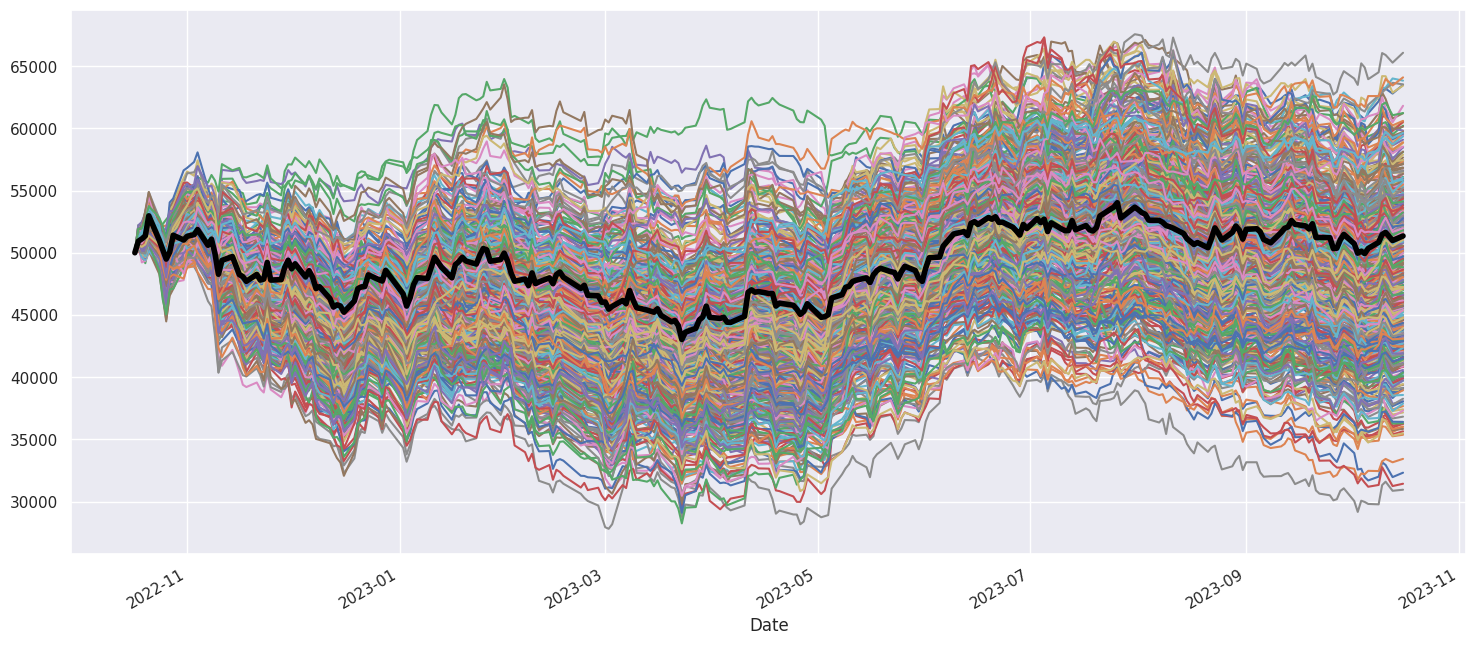

In [14]:
for i in range(500):
  carteira = random.sample(list(dados_yahoo.columns) , k=5)
  carteira = 10000 * retorno_acumulado.loc[: , carteira]
  carteira['saldo'] = carteira.sum(axis=1)
  carteira['saldo'].plot(figsize=(18,8))

(ibov*50000).plot(linewidth=4, color='black')
